### The code snippet below is used to extract  data science job listings in Nigeria from "Indeed website",i extract the 'job_title', 'company name', 'summary of the job description', 'location of the job vacancy' and 'salary range'

# Import relevant libraries

In [1]:
import requests # this is used to get the data from the website
from bs4 import BeautifulSoup as bs
import time
import csv # This will be used later to save the file as "csv"
import os  #os means operating system

## First scrape indiviually to make sure we scrape the right words

In [2]:
source = requests.get('https://ng.indeed.com/jobs?q=data+science&l=Nigeria').text #extract the text part of the page
soup = bs(source, 'lxml')  # convert into a beautifulsoup object and parse as lxml which is preferable.
#print(soup.prettify())   #prettify is used proper indentation of html

jobs = soup.find('div', class_='result')
job_title = jobs.a.text.strip() #Strip is to avoid blank space
print(job_title)

Data Analyst


In [3]:
#our second column is the company name
company = jobs.find('span', class_='company').text.strip()
print(company)

HReade Limited


In [4]:
location = jobs.find('span', class_='location').text.strip()
print(location)

Lagos


In [5]:
# the fourth column is the summary of the job description
summary = jobs.find('div', class_='summary').text.strip()
print(summary)

Develops and conducts routine data audits to verify data accuracy;
Builds ingestion processes to prepare, extract, and annotate data variety of structured and…


In [6]:
#the fifth column is the salary range
salary = jobs.find('span', class_='salaryText').text.strip()
print(salary)

₦15 a month


## We then scrape in large quantity to make use of the data and save as "csv" for storage.

In [10]:
pages = [0, 10, 20, 30, 40, 50]# we specify the number of pages we want to loop (6 pages)

#We save as csv, specify the folder we want it to be stored. 'a' means append as we merge 5 columns,'newline' to give it space
with open('C:/Users/HP/Jupyter_folder/Hamoye/datascience_job.csv', 'a',encoding='utf-8', newline='') as f_output:
    csv_print = csv.writer(f_output)
    
    file_is_empty = os.stat('C:/Users/HP/Jupyter_folder/Hamoye/datascience_job.csv').st_size == 0
    if file_is_empty:          #if file is empty, just print the column head alone 
        csv_print.writerow(['Job_title', 'Company', 'Location','Summary','Salary'])
        
#write the code in a for loop to look into other job posting
    for page in pages:
        source = requests.get('https://ng.indeed.com/jobs?q=Data+science&l=Nigeria&start={}'.format(page)).text
        soup = bs(source, 'lxml')# convert into a beautifulsoup object and parse as lxml which is preferable.

#try except is used to skip missing part of the script so as not to stop it.
        for jobs in soup.find_all('div', class_='result'):
         
            try:
                job_title = jobs.a.text.strip()
            except Exception as e:
                job_title = None
            print('Job Title:',job_title)
    
            try:
                company = jobs.find('span', class_='company').text.strip()
            except Exception as e:
                company = None
            print('Company:',company)
    
            try:
               location = jobs.find('span', class_='location').text.strip()
            except Exception as e:
                location = None
            print('Location:',location)
          
            try:    
                summary = jobs.find('div', class_='summary').text.strip()
            except Exception as e:
                summary = None
            print('Summary:',summary)
    
            try:
               salary = jobs.find('span', class_='salaryText').text.strip()
            except Exception as e:
                salary = None
            print('Salary:', salary)
    
            print('---------------') #this is used for easy damarcation.
    
            time.sleep(2) #it will take 2 seconds before the next page load, this is to
                  #regulate the scraping and not go too hard on the website.
    
            csv_print.writerow([job_title, company, location, summary, salary])

Job Title: Data Analyst
Company: HReade Limited
Location: Lagos
Summary: Develops and conducts routine data audits to verify data accuracy;
Builds ingestion processes to prepare, extract, and annotate data variety of structured and…
Salary: ₦15 a month
---------------
Job Title: Quality Control Officer
Company: Rite Foods Limited
Location: Ijebu-Ode
Summary: First degree in Food science, Chemistry or any Science related discipline.
Collating test data and drafting quality reports.
Salary: None
---------------
Job Title: DATA ENTRY EXECUTIVE
Company: None
Location: Lagos
Summary: In Computer Science with proven experience and ability to transfer data into specified files format or database systems, and retrieve data from the database or…
Salary: None
---------------
Job Title: Computer Analyst
Company: Dedora Nig. Ltd
Location: Lagos
Summary: Design and maintain data processing systems.
Troubleshoot and fix day-to-day software and hardware problems.
Diagnose and repair inventory errors.

Job Title: Human Resource Assistant
Company: TechnoServe
Location: Nigeria
Summary: Maintain staff training data, coordinate training materials and logistics for HR Officer.
Maintain and update employees list and employees data through UltiPro.
Salary: None
---------------
Job Title: Samsung Engineer
Company: Xyples LLC
Location: Lagos
Summary: BS in Computer Science or Engineering.
Develop and utilize test data that support the implementation of test plans and procedures.
11 am to 10 pm.
Salary: ₦70,000 - ₦302,000 a month
---------------
Job Title: Monitoring, Evaluation and Learning Assistants
Company: None
Location: Nigeria
Summary: Manage regular synchronizations and backups of field data to cloud-based data management system.
Regularly review data entered into the M&E system to locate and…
Salary: None
---------------
Job Title: Team Lead, Customer Advocacy Center
Company: ipNX
Location: Lagos
Summary: University Degree in Sciences, Social Sciences acceptable (2.2/Upper Credit).
E

Job Title: Sterling Bank Plc Recruitment for HR Business Partner
Company: Sterling Bank Plc
Location: Lagos
Summary: First degree in any discipline, Master's or equivalent degree in Human Resources Management, Organizational Development, Social Sciences, Business…
Salary: None
---------------
Job Title: Data Scientist
Company: Ibex Recruitment
Location: Plateau
Summary: Experience with Data Science, AI, and Machine Learning ideal.
Experienced Data Analyst- 5 years +.
Experienced Data Analyst– 3 years +.
Salary: None
---------------
Job Title: Quality Control Officer Job at Erisco Foods Limited
Company: Erisco Foods Limited
Location: Lagos
Summary: B.Sc, B.Tech in Biochemistry, Industrial Chemistry, Food Science Technology and Science related course.
Erisco Foods Limited is an indigenous food product…
Salary: None
---------------
Job Title: Quality Control Manager
Company: None
Location: Lagos
Summary: Chemical Science or Chemistry / B.Sc.
 Maintain Quality Data Management & MIS system

### Import libraries and read the dataset

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('datascience_job.csv')
data.head()

,Job_title,Company,Location,Summary,Salary
0,Data Analyst,HReade Limited,Lagos,Develops and conducts routine data audits to v...,₦15 a month
1,Quality Control Officer,Rite Foods Limited,Ijebu-Ode,"First degree in Food science, Chemistry or any...",NaN
2,DATA ENTRY EXECUTIVE,NaN,Lagos,In Computer Science with proven experience and...,NaN
3,Computer Analyst,Dedora Nig. Ltd,Lagos,Design and maintain data processing systems.\n...,"₦80,000 - ₦90,000 a month"
4,Business analyst,Dawson consulting,Lagos,Experience in analysing data to draw business-...,"₦70,000 - ₦85,000 a month"


### Exploratory analysis for insights extraction.

In [12]:
# find the number of rows and columns in the data
data.shape

(90, 5)

In [13]:
#Check for missing values and the type of data
print(data.count())
print(data.info())

Job_title    90
Company      64
Location     90
Summary      90
Salary       13
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Job_title  90 non-null     object
 1   Company    64 non-null     object
 2   Location   90 non-null     object
 3   Summary    90 non-null     object
 4   Salary     13 non-null     object
dtypes: object(5)
memory usage: 3.6+ KB
None


#### There are a lot of missing values in 'salary' column  and 28 missing value in 'company name' column. This means companies rarely put out the salary of a job posting.

In [14]:
#Although all column are object, we can find some summary statistics
data.describe(include='all')

,Job_title,Company,Location,Summary,Salary
count,90,64,90,90,13
unique,84,46,14,87,8
top,Data Analyst,Xyples LLC,Lagos,"First degree in any discipline, Master's or eq...","₦70,000 - ₦302,000 a month"
freq,3,7,56,2,4


In [15]:
# We find the frequency of unique values in columns
print(data['Job_title'].value_counts())
print(data['Location'].value_counts())

Data Analyst                                                3
Data Scientist                                              3
Quality Auditor                                             2
Nutritionist                                                2
Production Superintendent – Oil & Gas Sector                1
                                                           ..
Data.FI Nigeria Programmer--Consultant                      1
Samsung Engineer                                            1
Web developement intern                                     1
Project Software Engineer Job at Proxynet Communications    1
Cybersecurity Business Head                                 1
Name: Job_title, Length: 84, dtype: int64
Lagos        56
Nigeria      13
Abuja         3
Yaba          3
Abia          2
Maiduguri     2
Ikeja         2
Lekki         2
Ibadan        2
Kebbi         1
Borno         1
Plateau       1
Onitsha       1
Ijebu-Ode     1
Name: Location, dtype: int64


#### 3 out of 90  data science job posting in Nigeria actually have the title "Data Scientist"(3.33%). 56 out of 90 job posting is from Lagos , that is 62%.

In [16]:
print(data['Salary'].value_counts())
print(data['Company'].value_counts())

₦70,000 - ₦302,000 a month     4
₦15 a month                    2
₦70,000 - ₦202,000 a month     2
₦80,000 - ₦90,000 a month      1
₦65,000 - ₦85,000 a month      1
₦120,000 - ₦240,000 a month    1
₦70,000 - ₦85,000 a month      1
₦50,000 - ₦60,000 a month      1
Name: Salary, dtype: int64
Xyples LLC                                     7
TechnoServe                                    4
Bridge International Academies                 3
HReade Limited                                 2
Renmoney                                       2
Edge Recruiter Nigeria                         2
Ascentech                                      2
Economic Community of West African States      2
careersome                                     2
Microsoft                                      2
Dedora Nig. Ltd                                1
Redwire Marketing Consulting                   1
Gozem                                          1
The Synagogue, Church Of All Nations(SCOAN)    1
Ibex Recruitment       

#### Xyples LLC has the highest number of job posting in the last few month

Text(0.5, 1.0, 'Top 20 companies job posting')

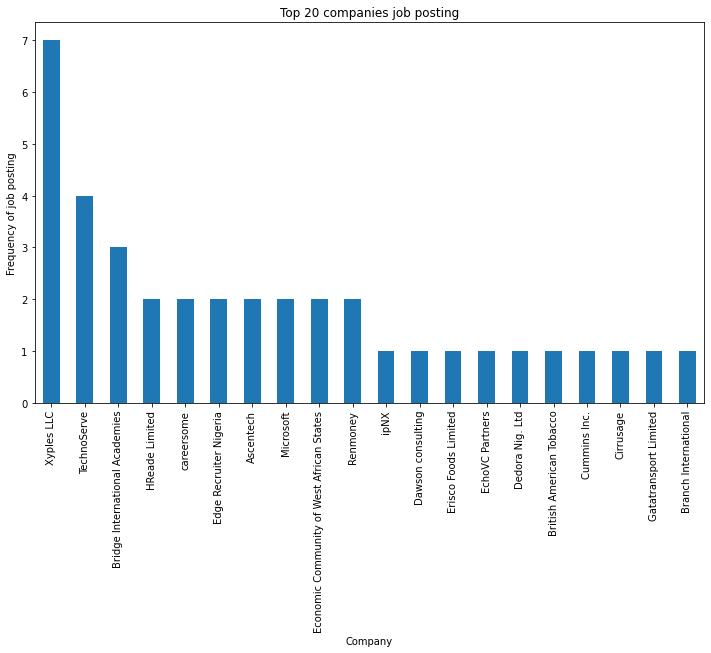

In [17]:
# To visualize the top 20 companies with highest number of job postings
job_company = data.groupby('Company').count()['Job_title']
job_company.sort_values(ascending=False)[:20].plot(kind='bar', figsize=(12,7))

plt.xlabel('Company')
plt.ylabel('Frequency of job posting')
plt.title("Top 20 companies job posting")

Text(0.5, 1.0, 'Top location job posting')

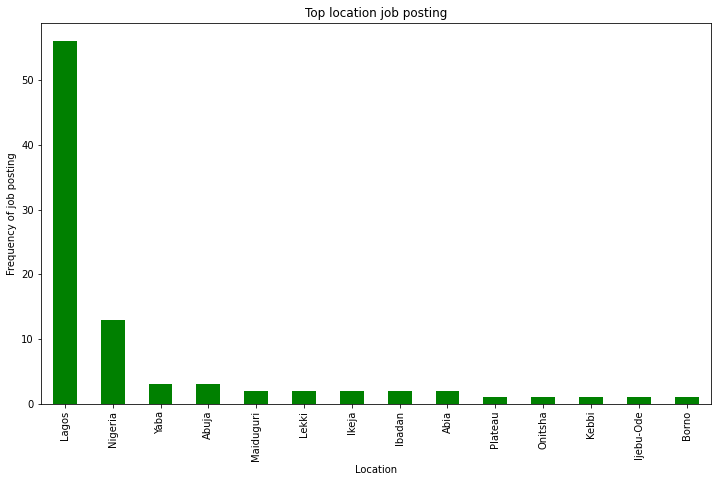

In [18]:
# To visualize the location frequency of job posting
job_company = data.groupby('Location').count()['Job_title']
job_company.sort_values(ascending=False)[:20].plot(kind='bar', figsize=(12,7), color='green')

plt.xlabel('Location')
plt.ylabel('Frequency of job posting')
plt.title("Top location job posting")
